In [1]:
using Plots
using DifferentialEquations
using BenchmarkTools
using ForwardDiff

┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\Owner\.julia\packages\BoundaryValueDiffEqShooting\yn80C\src\single_shooting.jl:7


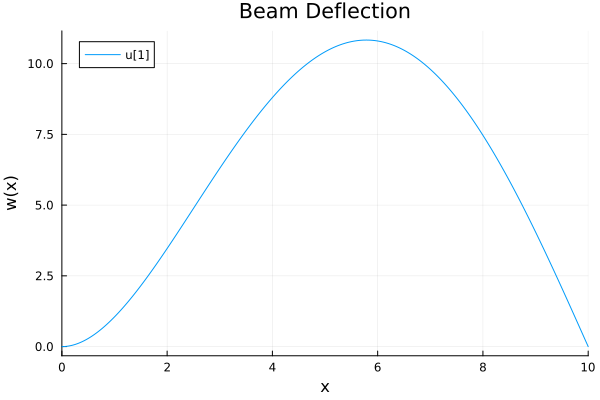

In [2]:
EI = 5.0  
q(x) = 1.0 

function beam_equation!(du, u, p, x)
    du[1] = u[2]             
    du[2] = u[3]               
    du[3] = u[4]               
    du[4] = q(x) / EI          
end

function boundary_conditions!(residual, u, p, x)
    residual[1] = u[1][1]                                              # Deflection at the beginning 
    residual[2] = u[2][1]                                              # Slope at the beginning W2=W1=0
    residual[end] = u[end][3]                                          # Bending Moment at the end 
    residual[end-1] = u[end][1]                                        # Deflection at the end  
end

function initial_guess(x)
    [0.0, 0.0, 0.0, 0.0]
end

xspan = (0.0, 10.0)          
bvp = BVProblem(beam_equation!, boundary_conditions!, initial_guess, xspan)

sol = solve(bvp)

plot(sol, idxs=1, xlabel="x", ylabel="w(x)", title="Beam Deflection")


┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\Owner\.julia\packages\BoundaryValueDiffEqShooting\yn80C\src\single_shooting.jl:7


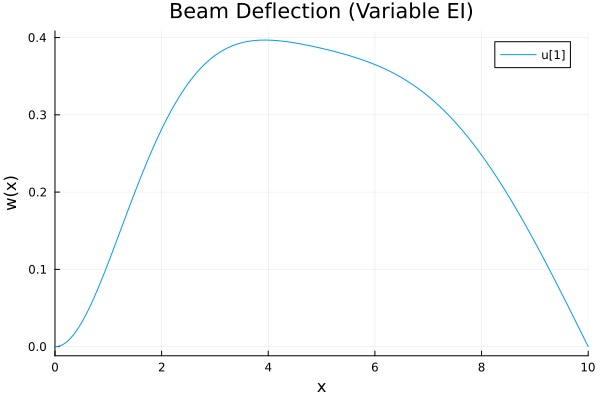

In [4]:
EIf(x) = 1.0 + x^2 + sin(x)  
q(x) = sin(x)        

function beam_equation!(du, u, p, x)
    dEIF(x) = ForwardDiff.derivative(x -> EIf(x), x)
    ddEIF(x) = ForwardDiff.derivative(x -> dEIF(x), x)    
    du[1] = u[2]                           
    du[2] = u[3]                           
    du[3] = u[4]                           
    du[4] = (q(x) - ddEIF(x)*u[2] - 2*ddEIF(x)*u[3]) / EIf(x)
end

function boundary_conditions!(residual, u, p, x)
    residual[1] = u[1][1]                                              # Deflection at the beginning 
    residual[2] = u[2][1]                                              # Slope at the beginning W2=W1=0
    residual[end] = u[end][3]                                          # Bending Moment at the end 
    residual[end-1] = u[end][1]                                        # Deflection at the end   
end

function initial_guess(x)
    [0.0, 0.0, 0.0, 0.0]
end

xspan = (0.0, 10.0)           
bvp = BVProblem(beam_equation!, boundary_conditions!, initial_guess, xspan)

sol = solve(bvp) 
plot(sol, idxs = 1, xlabel="x", ylabel="w(x)", title="Beam Deflection (Variable EI)")


┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\Owner\.julia\packages\BoundaryValueDiffEqShooting\yn80C\src\single_shooting.jl:7


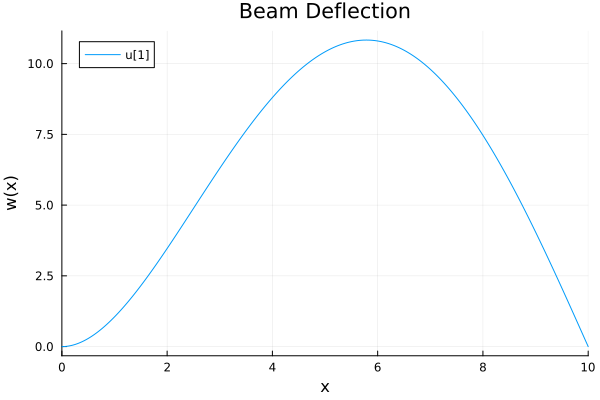

In [5]:
EI = 5.0  
q(x) = 1.0 

function beam_equation!(du, u, p, x)
    du[1] = u[2]             
    du[2] = u[3]               
    du[3] = u[4]               
    du[4] = q(x) / EI          
end

function boundary_conditions!(residual, u, p, x)
    residual[1] = u[1][1]                                              # Deflection at the beginning 
    residual[2] = u[2][1]                                              # Slope at the beginning W2=W1=0
    residual[end] = u[end][3]                                          # Bending Moment at the end 
    residual[end-1] = u[end][1]                                        # Deflection at the end  
end

function initial_guess(x)
    [0.0, 0.0, 0.0, 0.0]
end

xspan = (0.0, 10.0)          
bvp = BVProblem(beam_equation!, boundary_conditions!, initial_guess, xspan)

sol = solve(bvp)

plot(sol, idxs=1, xlabel="x", ylabel="w(x)", title="Beam Deflection")
